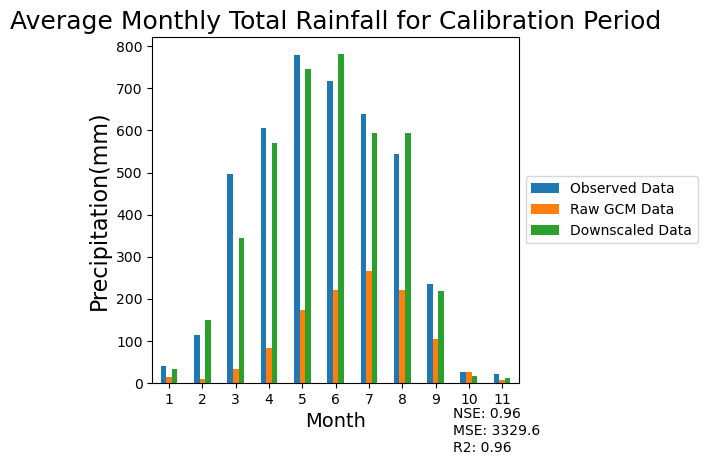

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# File path
file_path = 'F:\Research\Drought Thesis\Analysis\SDSM\Calibration And Validation MPI\Rainfall\Validation\Comparison Validation Rainfall.xlsx'

# Read Excel file
df = pd.read_excel(file_path)

# Extract observed, raw GCM, and downscaled data
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 2]
downscaled_data = df.iloc[1:, 3]

# Calculate MSE
mse = mean_squared_error(observed_data, downscaled_data)

# Calculate R2
r2 = r2_score(observed_data, downscaled_data)

# Calculate NSE
nse = 1 - (mse / observed_data.var())

# Specify the legend
legend = ['Observed Data', 'Raw GCM Data', 'Downscaled Data']

# Create the bar chart
data = df.iloc[1:, 1:]
ax = data.plot.bar()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation(mm)', fontsize=16)
plt.title('Average Monthly Total Rainfall for Calibration Period', fontsize=18)

# Display the calculated values below the legend
plt.text(0.82, -0.1, f"NSE: {round(nse, 2)}", transform=ax.transAxes)
plt.text(0.82, -0.15, f"MSE: {round(mse, 2)}", transform=ax.transAxes)
plt.text(0.82, -0.2, f"R2: {round(r2, 2)}", transform=ax.transAxes)

plt.xticks(rotation=0)

# Move the legend outside the plot
plt.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# File path
file_path = 'F:\Research\Drought Thesis\Analysis\SDSM\Calibration And Validation MPI\Rainfall\Validation\Comparison Validation Rainfall.xlsx'

# Read Excel file
df = pd.read_excel(file_path)
df.head()

,Month,Observed Data,Raw GCM,Downscaled Data
0,1,6.428571,5.951988,9.700164
1,2,39.428571,13.693520,32.298321
2,3,112.714286,9.574768,148.313179
3,4,497.571429,32.099337,343.538321
4,5,606.428571,82.428025,570.497600


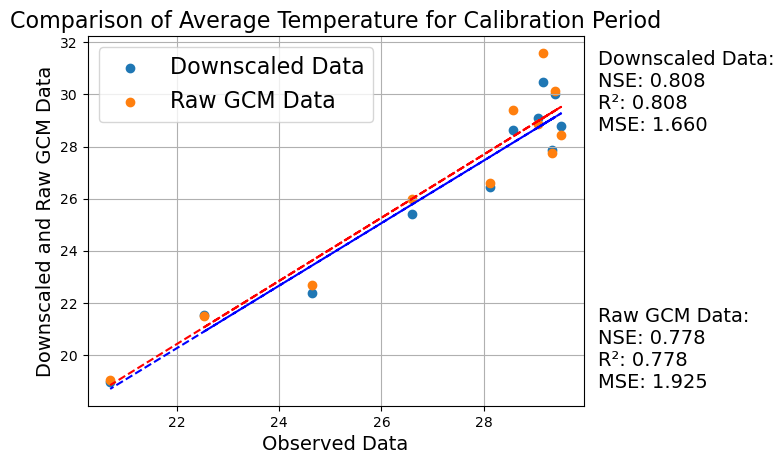

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# File path
file_path = 'F:\Research\Drought Thesis\Analysis\SDSM\Calibration And Validation MPI\Avg Temp\Comparison.xlsx'

# Read Excel file
df = pd.read_excel(file_path, sheet_name='Validation')


# Extract observed, raw GCM, and downscaled data
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 2]
downscaled_data = df.iloc[1:, 3]

# Create scatter plot
plt.scatter(observed_data, downscaled_data, label='Downscaled Data')
plt.scatter(observed_data, raw_gcm_data, label='Raw GCM Data')

# Add trendlines
z1 = np.polyfit(observed_data, downscaled_data, 1)
p1 = np.poly1d(z1)
plt.plot(observed_data,p1(observed_data),"b--")

z2 = np.polyfit(observed_data, raw_gcm_data, 1)
p2 = np.poly1d(z2)
plt.plot(observed_data,p2(observed_data),"r--")

# Set x and y labels
plt.xlabel('Observed Data', fontsize=14)
plt.ylabel('Downscaled and Raw GCM Data', fontsize=14)

# Add legend
plt.legend(fontsize=16)

# Calculate NSE, R², and MSE for downscaled data
nse_downscaled = 1 - sum((downscaled_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_downscaled = r2_score(observed_data, downscaled_data)
mse_downscaled = mean_squared_error(observed_data, downscaled_data)

# Calculate NSE, R², and MSE for raw GCM data
nse_raw_gcm = 1 - sum((raw_gcm_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_raw_gcm = r2_score(observed_data, raw_gcm_data)
mse_raw_gcm = mean_squared_error(observed_data, raw_gcm_data)

# Display NSE, R², and MSE values outside of plot
ax = plt.gca()
ax.annotate(f'Downscaled Data:\nNSE: {nse_downscaled:.3f}\nR²: {r2_downscaled:.3f}\nMSE: {mse_downscaled:.3f}', xy=(1.0, 1.0), xycoords='axes fraction', xytext=(10, -10), textcoords='offset points', ha='left', va='top', fontsize=14)
ax.annotate(f'Raw GCM Data:\nNSE: {nse_raw_gcm:.3f}\nR²: {r2_raw_gcm:.3f}\nMSE: {mse_raw_gcm:.3f}', xy=(1.0, 0.0), xycoords='axes fraction', xytext=(10, 10), textcoords='offset points', ha='left', va='bottom', fontsize=14)

# Add grid
plt.grid()

# Set title
plt.title('Comparison of Average Temperature for Calibration Period', fontsize=16)

# Show plot
plt.show()


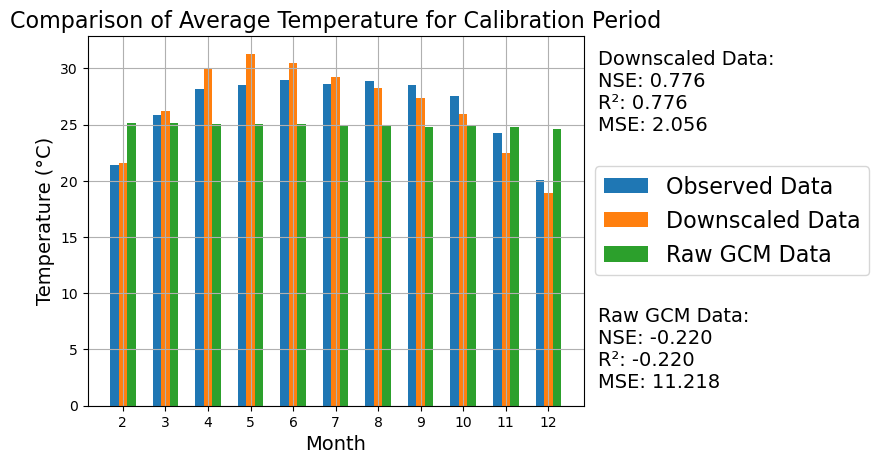

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# File path
file_path = 'F:\Research\Drought Thesis\Analysis\SDSM\Calibration And Validation MPI\Avg Temp\Comparison.xlsx'

# Read Excel file
df = pd.read_excel(file_path, sheet_name='Calibration')
# Extract observed, raw GCM, and downscaled data
month = df.iloc[1:, 0]
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 2]
downscaled_data = df.iloc[1:, 3]

# Extract observed, raw GCM, and downscaled data
month = df.iloc[1:, 0]
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 3]
downscaled_data = df.iloc[1:, 2]

# Create bar chart
bar_width = 0.2
index = np.arange(len(observed_data))
plt.bar(index, observed_data, bar_width, label='Observed Data')
plt.bar(index + bar_width, downscaled_data, bar_width, label='Downscaled Data')
plt.bar(index + 2 * bar_width, raw_gcm_data, bar_width, label='Raw GCM Data')

# Set xticks and labels
plt.xticks(index + bar_width, month)

# Set x and y labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Add legend outside of plot area
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Calculate NSE, R², and MSE for downscaled data
nse_downscaled = 1 - sum((downscaled_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_downscaled = r2_score(observed_data, downscaled_data)
mse_downscaled = mean_squared_error(observed_data, downscaled_data)

# Calculate NSE, R², and MSE for raw GCM data
nse_raw_gcm = 1 - sum((raw_gcm_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_raw_gcm = r2_score(observed_data, raw_gcm_data)
mse_raw_gcm = mean_squared_error(observed_data, raw_gcm_data)

# Display NSE, R², and MSE values outside of plot
ax = plt.gca()
ax.annotate(f'Downscaled Data:\nNSE: {nse_downscaled:.3f}\nR²: {r2_downscaled:.3f}\nMSE: {mse_downscaled:.3f}', xy=(1.0, 1.0), xycoords='axes fraction', xytext=(10, -10), textcoords='offset points', ha='left', va='top', fontsize=14)
ax.annotate(f'Raw GCM Data:\nNSE: {nse_raw_gcm:.3f}\nR²: {r2_raw_gcm:.3f}\nMSE: {mse_raw_gcm:.3f}', xy=(1.0, 0.0), xycoords='axes fraction', xytext=(10, 10), textcoords='offset points', ha='left', va='bottom', fontsize=14)

# Add grid
plt.grid()

# Set title
plt.title('Comparison of Average Temperature for Calibration Period', fontsize=16)

# Show plot
plt.show()


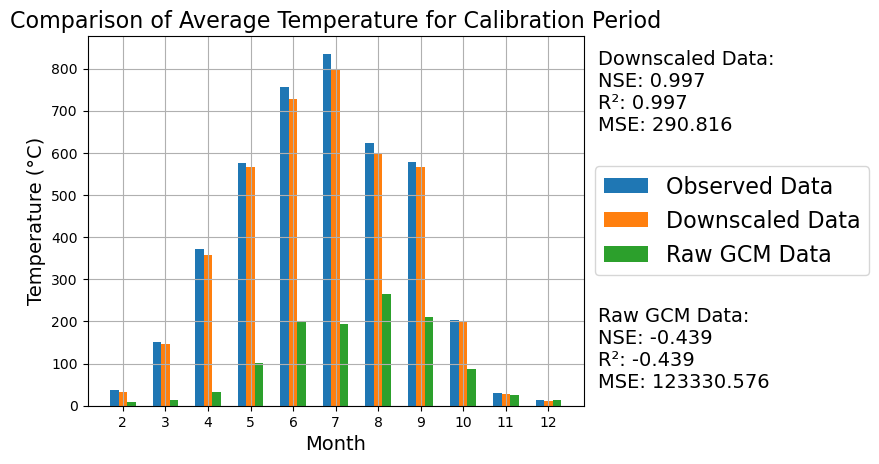

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# File path
file_path = 'F:\Research\Drought Thesis\Analysis\SDSM\Calibration And Validation MPI\Rainfall\Calibration\Comparison Rainfall Calibration.xlsx'

# Read Excel file
df = pd.read_excel(file_path)
# Extract observed, raw GCM, and downscaled data
month = df.iloc[1:, 0]
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 2]
downscaled_data = df.iloc[1:, 3]

# Extract observed, raw GCM, and downscaled data
month = df.iloc[1:, 0]
observed_data = df.iloc[1:, 1]
raw_gcm_data = df.iloc[1:, 2]
downscaled_data = df.iloc[1:, 3]

# Create bar chart
bar_width = 0.2
index = np.arange(len(observed_data))
plt.bar(index, observed_data, bar_width, label='Observed Data')
plt.bar(index + bar_width, downscaled_data, bar_width, label='Downscaled Data')
plt.bar(index + 2 * bar_width, raw_gcm_data, bar_width, label='Raw GCM Data')

# Set xticks and labels
plt.xticks(index + bar_width, month)

# Set x and y labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Add legend outside of plot area
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Calculate NSE, R², and MSE for downscaled data
nse_downscaled = 1 - sum((downscaled_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_downscaled = r2_score(observed_data, downscaled_data)
mse_downscaled = mean_squared_error(observed_data, downscaled_data)

# Calculate NSE, R², and MSE for raw GCM data
nse_raw_gcm = 1 - sum((raw_gcm_data - observed_data) ** 2) / sum((observed_data - np.mean(observed_data)) ** 2)
r2_raw_gcm = r2_score(observed_data, raw_gcm_data)
mse_raw_gcm = mean_squared_error(observed_data, raw_gcm_data)

# Display NSE, R², and MSE values outside of plot
ax = plt.gca()
ax.annotate(f'Downscaled Data:\nNSE: {nse_downscaled:.3f}\nR²: {r2_downscaled:.3f}\nMSE: {mse_downscaled:.3f}', xy=(1.0, 1.0), xycoords='axes fraction', xytext=(10, -10), textcoords='offset points', ha='left', va='top', fontsize=14)
ax.annotate(f'Raw GCM Data:\nNSE: {nse_raw_gcm:.3f}\nR²: {r2_raw_gcm:.3f}\nMSE: {mse_raw_gcm:.3f}', xy=(1.0, 0.0), xycoords='axes fraction', xytext=(10, 10), textcoords='offset points', ha='left', va='bottom', fontsize=14)

# Add grid
plt.grid()

# Set title
plt.title('Comparison of Average Temperature for Calibration Period', fontsize=16)

# Show plot
plt.show()
